# AML Project - Visualization and Clustering

In [37]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
import seaborn as sns

In [38]:
# Returns a DataFrame containing the 'df' numeric variables
def numeric(df):
    return df.select_dtypes(include = np.number)

In [39]:
trainMinMax = pd.read_csv('./data/preprocessed/trainMinMax.csv')
trainMinMax = trainMinMax.iloc[:,:25]
numericTrain = numeric(trainMinMax)

## Multivariate Exploratory Data Analysis

We will take a look at the relationships between numerical variables first regarding the target variable outcome.

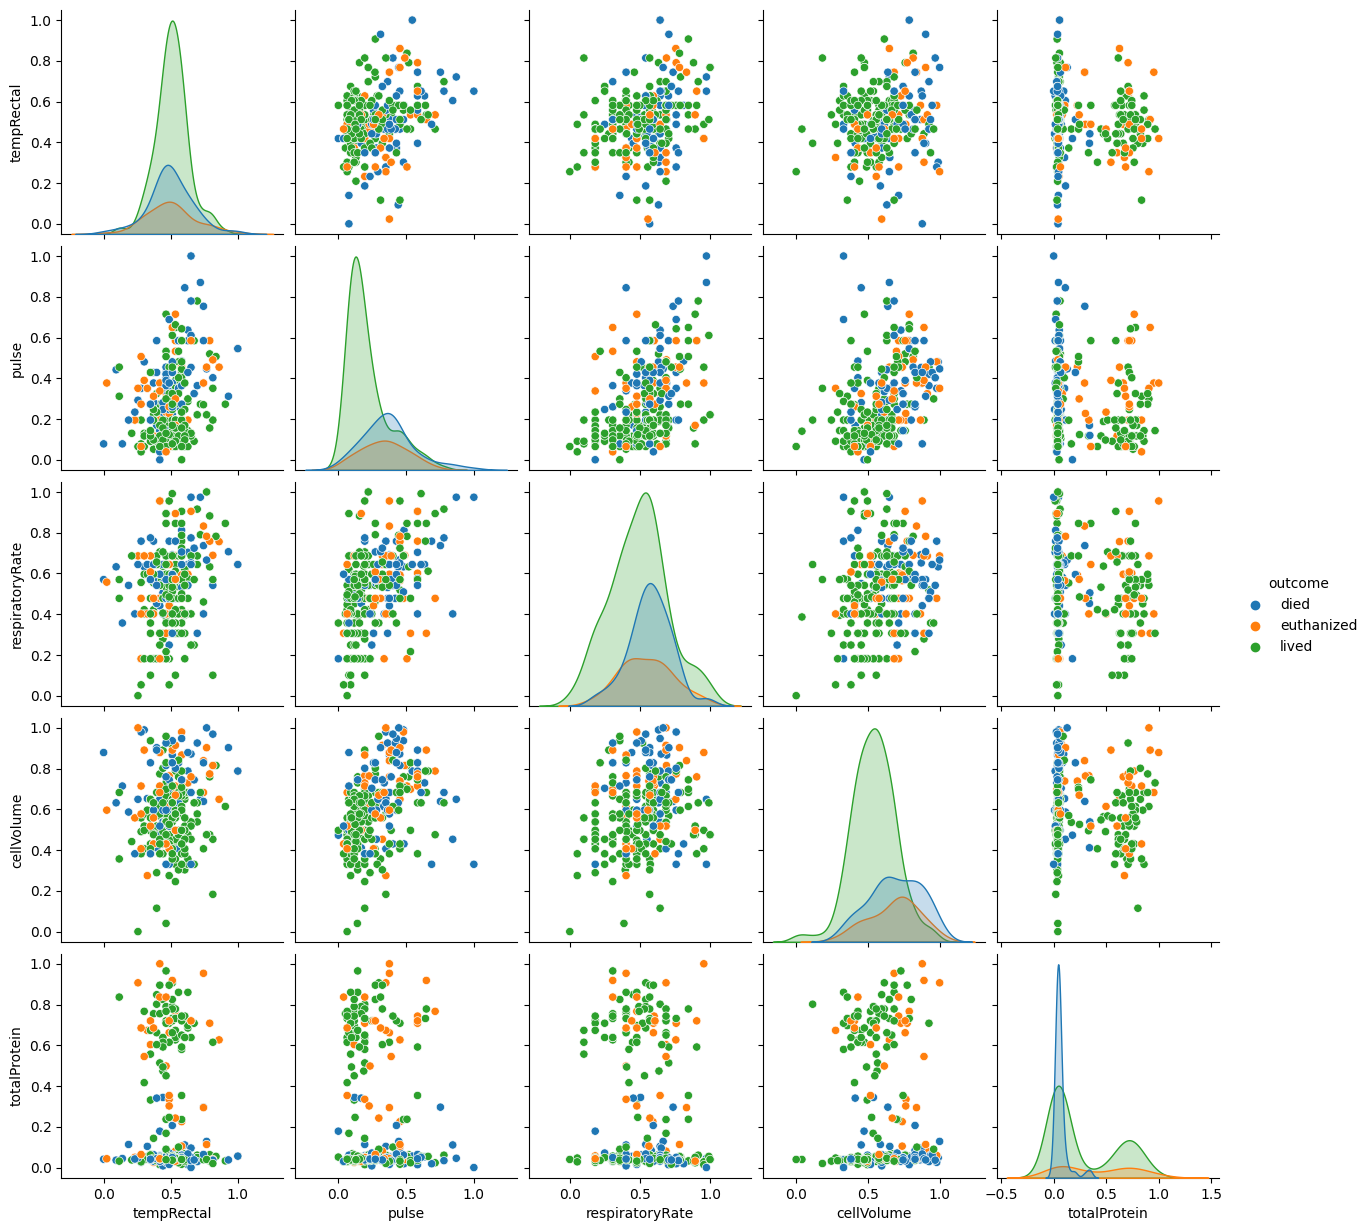

In [40]:
sns.pairplot(trainMinMax, hue="outcome");

From these plots data does not seem easily separable, although horse which end up dead tend to have lower values of `totalProtein`. Let's take a look at some multivariate plots to see other associations

For instance, we know that young horses tend to have higher pulse, as it was specified in the additional information.

<AxesSubplot: xlabel='pulsePeripheral', ylabel='pulse'>

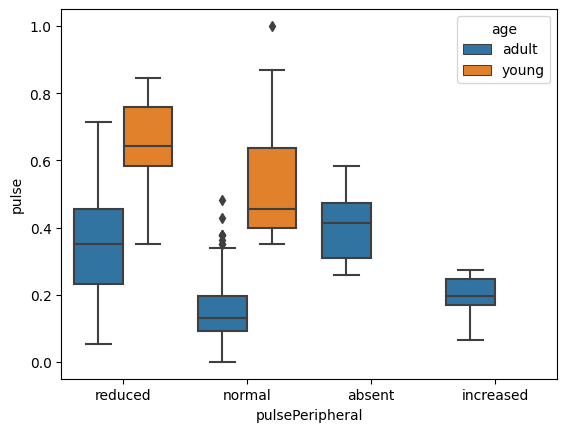

In [41]:
sns.boxplot(x="pulsePeripheral", y="pulse", hue='age', data=trainMinMax)

We also want to check the distribution of our target variable in other features.

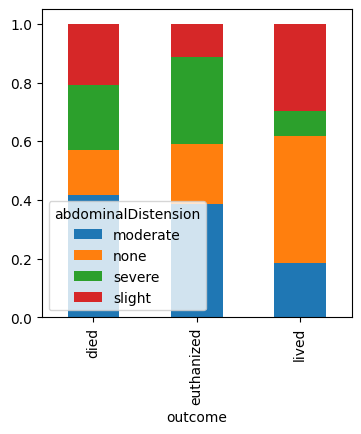

In [42]:
pd.crosstab(trainMinMax.abdominalDistension, 
            trainMinMax.outcome,
            normalize="columns").T.plot.bar(stacked=True, 
                                            figsize=(4,4));

It looks like severe abdominal distensions are more prone in horses that end up dead, while no distension is more frequent in alive horses. It may be easier to visually see it with the complementary plot.

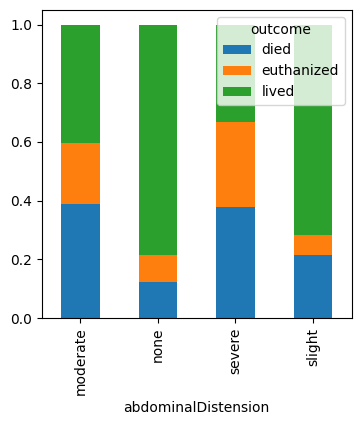

In [43]:
pd.crosstab(trainMinMax.outcome, 
            trainMinMax.abdominalDistension,
            normalize="columns").T.plot.bar(stacked=True, 
                                            figsize=(4,4));

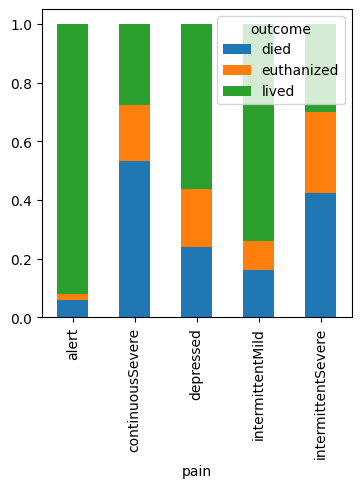

In [44]:
pd.crosstab(trainMinMax.outcome, 
            trainMinMax.pain,
            normalize="columns").T.plot.bar(stacked=True, 
                                            figsize=(4,4));

`pain` also seems to be a good indicator of whether the horse may live or not, as horses without it (alert) are rarely euthanized or end up dead.

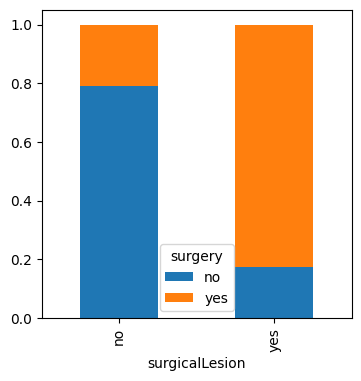

In [45]:
pd.crosstab(trainMinMax.surgery, 
            trainMinMax.surgicalLesion,
            normalize="columns").T.plot.bar(stacked=True, 
                                            figsize=(4,4));

`surgery` and `surgicalLesion` are variables the meaning of which seem very close.

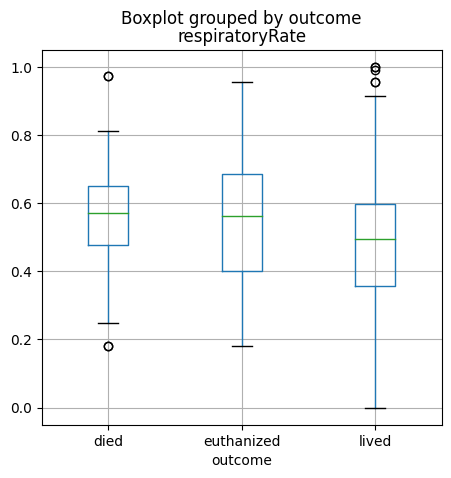

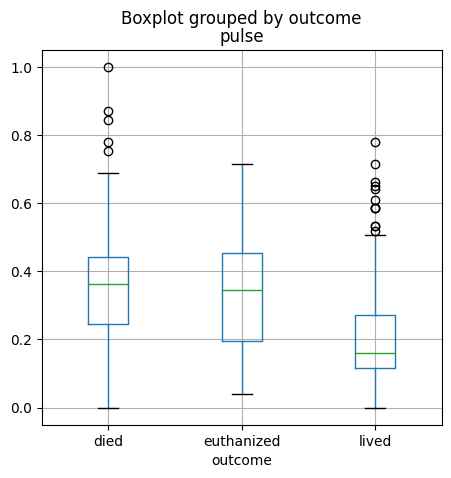

In [46]:
trainMinMax.boxplot(column='respiratoryRate',
                   by='outcome',
                   figsize=(5,5));
trainMinMax.boxplot(column='pulse',
                   by='outcome',
                   figsize=(5,5));

Text(0.5, 0, 'totalProtein')

Text(0.5, 0.5, 'cellVolume')

Text(0.5, 0, 'respiratoryRate')

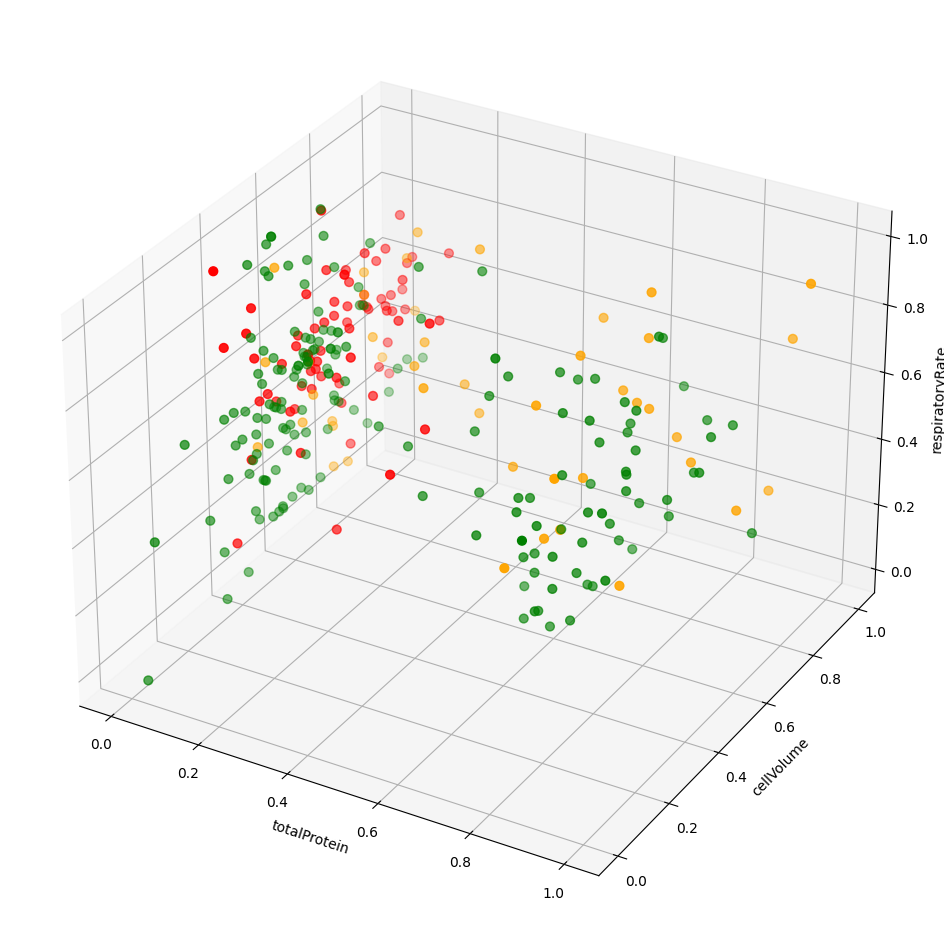

In [49]:
labels = trainMinMax.outcome

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

c1 = np.array(labels=="died")
c2 = np.array(labels=="euthanized")
c3 = np.array(labels=="lived")

X = numeric(trainMinMax)

ax.scatter(X.iloc[c1,4],X.iloc[c1,3],X.iloc[c1,2],c="red",s=40,label="C1")
ax.scatter(X.iloc[c2,4],X.iloc[c2,3],X.iloc[c2,2],c="orange",s=40,label="C2")
ax.scatter(X.iloc[c3,4],X.iloc[c3,3],X.iloc[c3,2],c="green",s=40,label="C3")

ax.set_xlabel('totalProtein') 
ax.set_ylabel('cellVolume') 
ax.set_zlabel('respiratoryRate')

Text(0.5, 0, 'respiratoryRate')

Text(0.5, 0.5, 'cellVolume')

Text(0.5, 0, 'totalProtein')

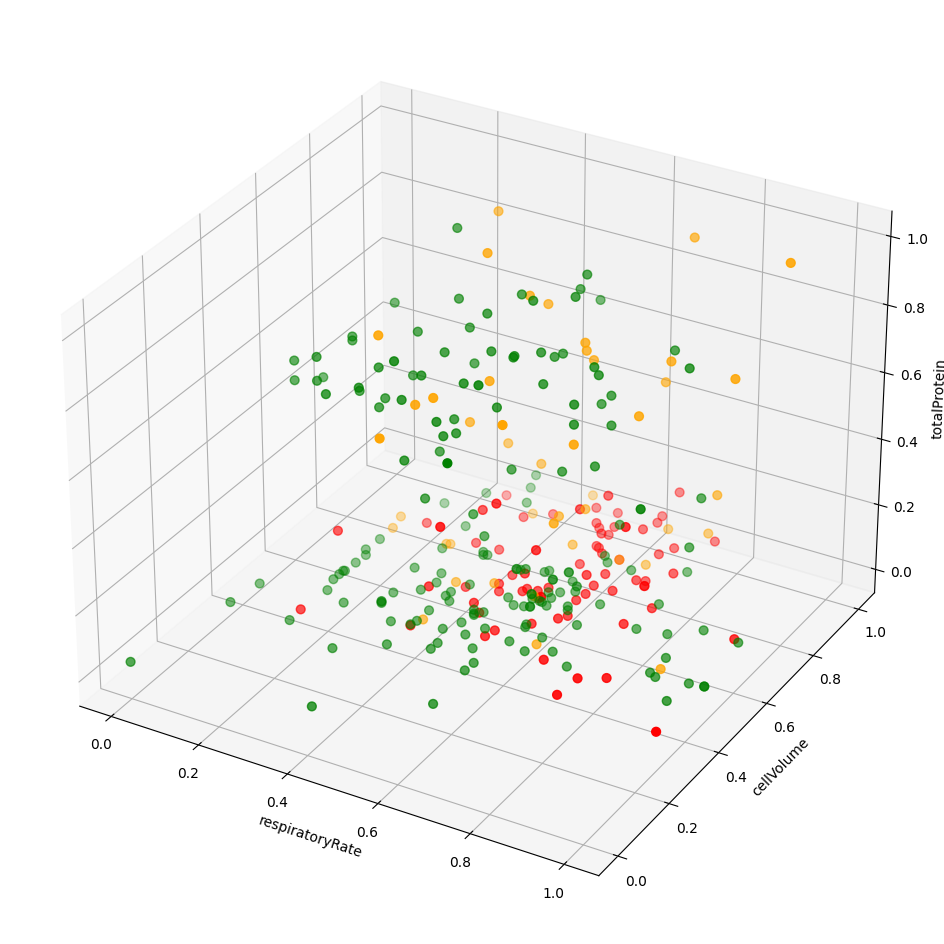

In [50]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[c1,2],X.iloc[c1,3],X.iloc[c1,4],c="red",s=40,label="C1")
ax.scatter(X.iloc[c2,2],X.iloc[c2,3],X.iloc[c2,4],c="orange",s=40,label="C2")
ax.scatter(X.iloc[c3,2],X.iloc[c3,3],X.iloc[c3,4],c="green",s=40,label="C3")

ax.set_xlabel('respiratoryRate')
ax.set_ylabel('cellVolume') 
ax.set_zlabel('totalProtein') 

Text(0.5, 0, 'tempRectal')

Text(0.5, 0.5, 'pulse')

Text(0.5, 0, 'respiratoryRate')

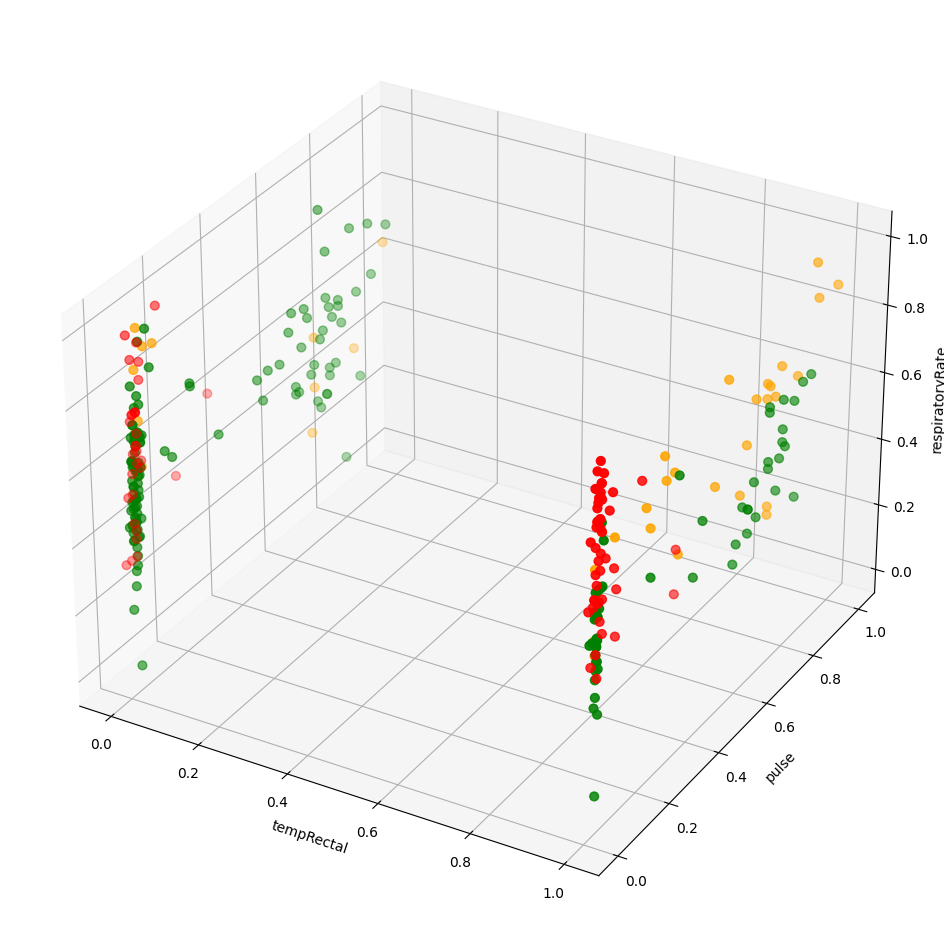

In [51]:
X = pd.read_csv('./data/preprocessed/trainMinMax.csv')

X = X[["abdomen_distendedLarge","totalProtein","cellVolume"]]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[c1,0],X.iloc[c1,1],X.iloc[c1,2],c="red",s=40,label="C1")
ax.scatter(X.iloc[c2,0],X.iloc[c2,1],X.iloc[c2,2],c="orange",s=40,label="C2")
ax.scatter(X.iloc[c3,0],X.iloc[c3,1],X.iloc[c3,2],c="green",s=40,label="C3")


ax.set_xlabel('tempRectal')
ax.set_ylabel('pulse') 
ax.set_zlabel('respiratoryRate') 

## Clustering with K-Means

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Elbow Curve')

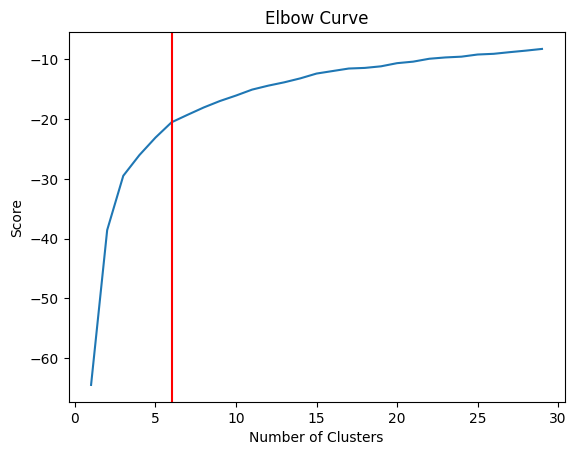

In [17]:
ks = range(1, 30, 1)

kmeans = [KMeans(n_clusters=k, n_init=10) for k in ks]
score = [kmeans[k].fit(numeric(trainMinMax)).score(numeric(trainMinMax)) for k in range(len(kmeans))]

fig = plt.plot(ks,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.axvline(x = 6, color = 'red')
plt.show()

Text(0.5, 0, 'respiratoryRate')

Text(0.5, 0.5, 'tempRectal')

Text(0.5, 0, 'pulse')

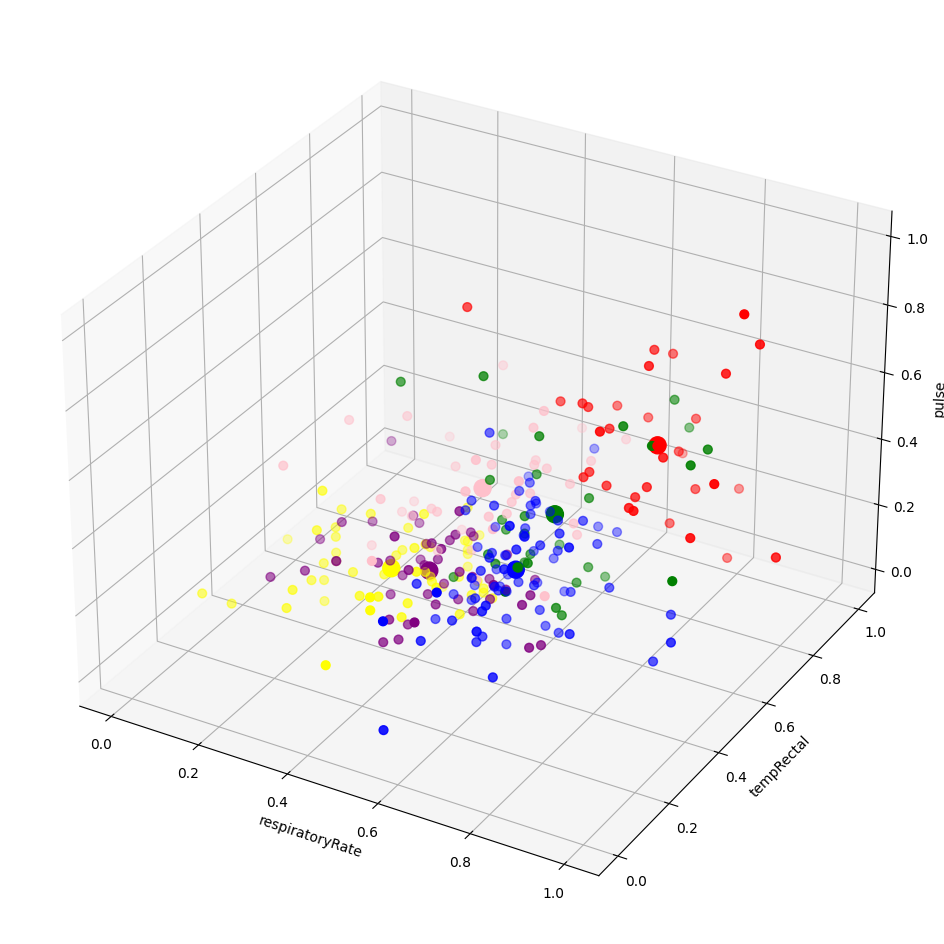

In [52]:
kmeans = KMeans(n_clusters=6, n_init=10).fit(numeric(trainMinMax))
centroids = kmeans.cluster_centers_
labels = kmeans.predict(numeric(trainMinMax))

centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

c1 = np.array(labels==0)
c2 = np.array(labels==1)
c3 = np.array(labels==2)
c4 = np.array(labels==3)
c5 = np.array(labels==4)
c6 = np.array(labels==5)

X = numeric(trainMinMax)
ax.scatter(centroids[:,2],centroids[:,0],centroids[:,1],c=["blue","yellow","red","green","purple","pink"],s=150,label="Centers",alpha=1)
ax.scatter(X.iloc[c1,2],X.iloc[c1,0],X.iloc[c1,1],c="blue",s=40,label="C1")
ax.scatter(X.iloc[c2,2],X.iloc[c2,0],X.iloc[c2,1],c="yellow",s=40,label="C2")
ax.scatter(X.iloc[c3,2],X.iloc[c3,0],X.iloc[c3,1],c="red",s=40,label="C3")
ax.scatter(X.iloc[c4,2],X.iloc[c4,0],X.iloc[c4,1],c="green",s=40,label="C4")
ax.scatter(X.iloc[c5,2],X.iloc[c5,0],X.iloc[c5,1],c="purple",s=40,label="C5")
ax.scatter(X.iloc[c6,2],X.iloc[c6,0],X.iloc[c6,1],c="pink",s=40,label="C6")


ax.set_xlabel('respiratoryRate')
ax.set_ylabel('tempRectal') 
ax.set_zlabel('pulse') 

Text(0.5, 0, 'pulse')

Text(0.5, 0.5, 'cellVolume')

Text(0.5, 0, 'totalProtein')

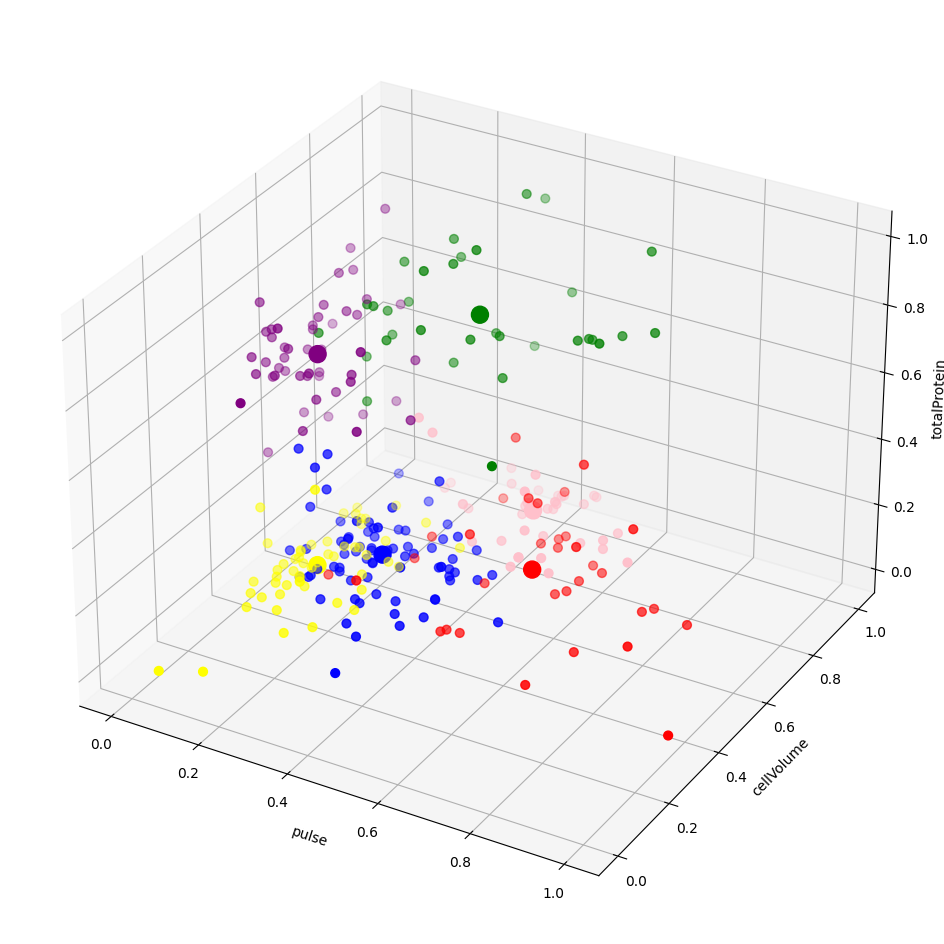

In [53]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

labels = kmeans.predict(numeric(trainMinMax))


c1 = np.array(labels==0)
c2 = np.array(labels==1)
c3 = np.array(labels==2)

X = numeric(trainMinMax)
ax.scatter(centroids[:,1],centroids[:,3],centroids[:,4],c=["blue","yellow","red","green","purple","pink"],s=150,label="Centers",alpha=1)
ax.scatter(X.iloc[c1,1],X.iloc[c1,3],X.iloc[c1,4],c="blue",s=40,label="C1")
ax.scatter(X.iloc[c2,1],X.iloc[c2,3],X.iloc[c2,4],c="yellow",s=40,label="C2")
ax.scatter(X.iloc[c3,1],X.iloc[c3,3],X.iloc[c3,4],c="red",s=40,label="C3")
ax.scatter(X.iloc[c4,1],X.iloc[c4,3],X.iloc[c4,4],c="green",s=40,label="C4")
ax.scatter(X.iloc[c5,1],X.iloc[c5,3],X.iloc[c5,4],c="purple",s=40,label="C5")
ax.scatter(X.iloc[c6,1],X.iloc[c6,3],X.iloc[c6,4],c="pink",s=40,label="C6")


ax.set_xlabel('pulse')
ax.set_ylabel('cellVolume') 
ax.set_zlabel('totalProtein') 

Although data is separed into clusters by distance, no clear natural cluster formations seem to be seen in three dimensions.

Text(0.5, 0, 'tempRectal')

Text(0.5, 0.5, 'pulse')

Text(0.5, 0, 'respiratoryRate')

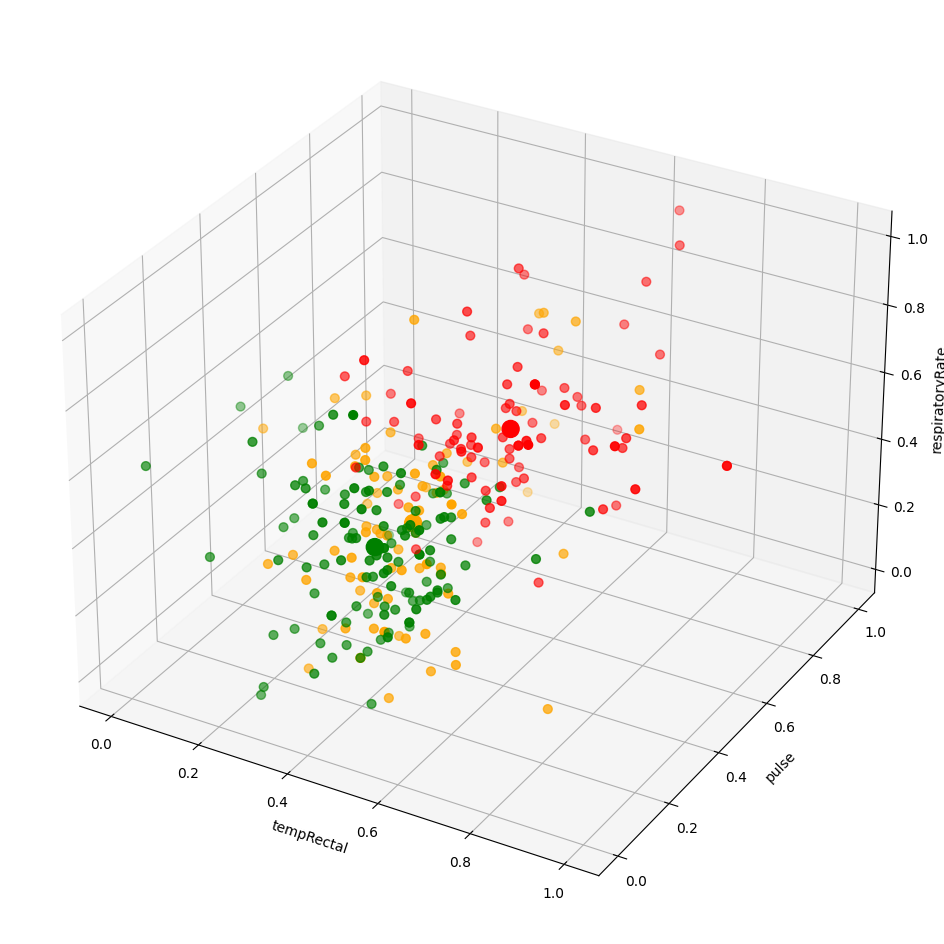

In [54]:
kmeans = KMeans(n_clusters=3, n_init=10).fit(numeric(trainMinMax))
centroids = kmeans.cluster_centers_
labels = kmeans.predict(numeric(trainMinMax))

centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

c1 = np.array(labels==0)
c2 = np.array(labels==1)
c3 = np.array(labels==2)

X = numeric(trainMinMax)
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c=["red","orange","green"],s=150,label="Centers",alpha=1)
ax.scatter(X.iloc[c1,0],X.iloc[c1,1],X.iloc[c1,2],c="red",s=40,label="C1")
ax.scatter(X.iloc[c2,0],X.iloc[c2,1],X.iloc[c2,2],c="orange",s=40,label="C2")
ax.scatter(X.iloc[c3,0],X.iloc[c3,1],X.iloc[c3,2],c="green",s=40,label="C3")

ax.set_xlabel('tempRectal')
ax.set_ylabel('pulse') 
ax.set_zlabel('respiratoryRate') 

Text(0.5, 0, 'totalProtein')

Text(0.5, 0.5, 'cellVolume')

Text(0.5, 0, 'respiratoryRate')

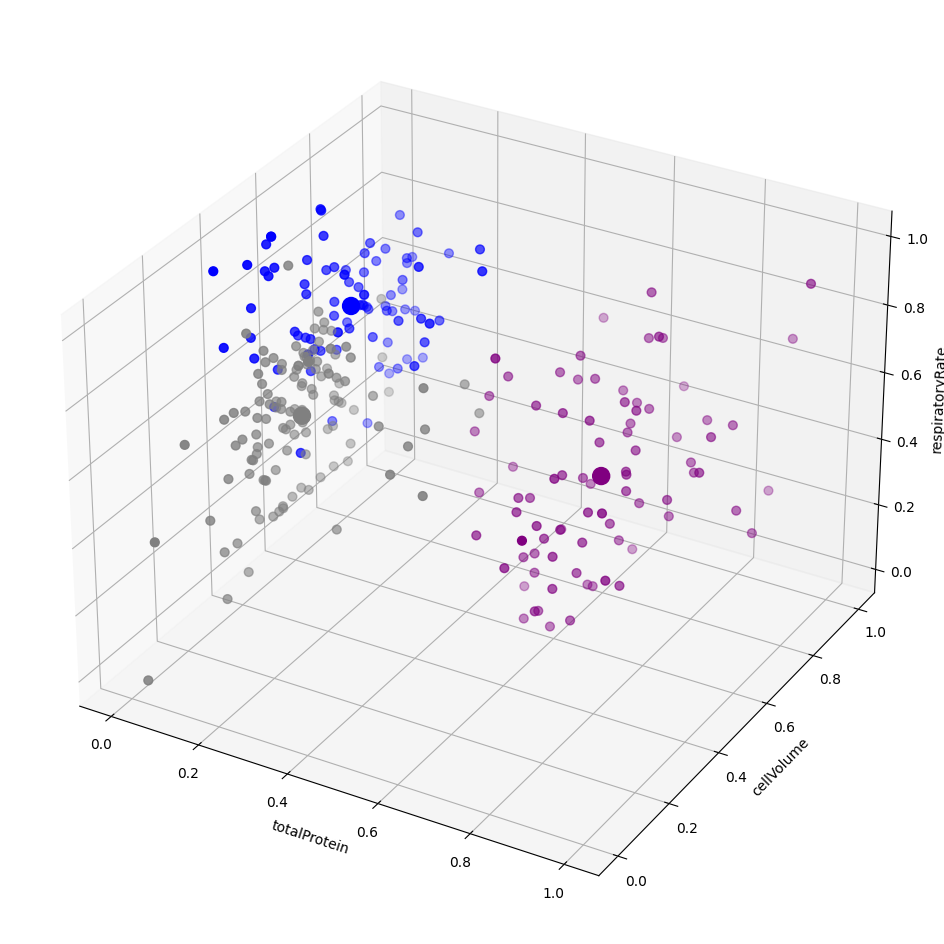

In [55]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

c1 = np.array(labels==0)
c2 = np.array(labels==1)
c3 = np.array(labels==2)

X = numeric(trainMinMax)
ax.scatter(centroids[:,4],centroids[:,3],centroids[:,2],c=["blue","purple","gray"],s=150,label="Centers",alpha=1)
ax.scatter(X.iloc[c1,4],X.iloc[c1,3],X.iloc[c1,2],c="blue",s=40,label="C1")
ax.scatter(X.iloc[c2,4],X.iloc[c2,3],X.iloc[c2,2],c="purple",s=40,label="C2")
ax.scatter(X.iloc[c3,4],X.iloc[c3,3],X.iloc[c3,2],c="gray",s=40,label="C3")

ax.set_xlabel('totalProtein')
ax.set_ylabel('cellVolume') 
ax.set_zlabel('respiratoryRate') 